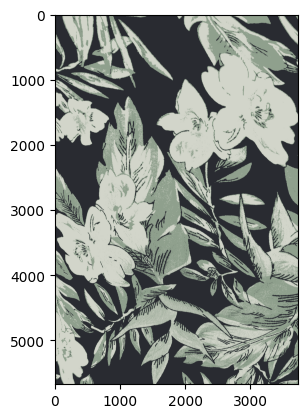

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
# unutk membaca gambar gunakan gambar sesuai dengan yg dimiliki
image = cv2.imread('images/batik 1.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# berfungsi untuk Membentuk ulang gambar menjadi susunan piksel 2D dan 3 nilai warna (RGB)
pixel_vals = image.reshape((-1,3))
# berfungsi untuk mengkonversikan ke tipe float
pixel_vals = np.float32(pixel_vals)

#baris kode di bawah ini menentukan kriteria agar algoritme berhenti berjalan,
#yang akan terjadi adalah 100 iterasi dijalankan atau epsilon (yang merupakan akurasi yang dibutuhkan)
#menjadi 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
# lalu lakukan k-means clustering dengan jumlah cluster yang ditetapkan sebagai 3
#juga pusat acak pada awalnya dipilih untuk pengelompokan k-means
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10,
cv2.KMEANS_RANDOM_CENTERS)
# mengonversi data menjadi nilai 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# membentuk ulang data menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)

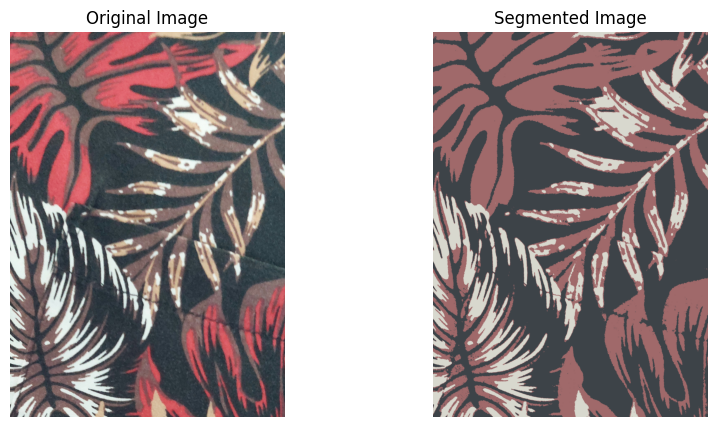

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar
image = cv2.imread('images/batik 2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Ubah gambar menjadi bentuk 2D (data vektor)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Definisikan k (jumlah cluster) dan kriteria konvergensi
k = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Inisialisasi centroid secara acak dan lakukan K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Ubah centroid menjadi tipe data uint8 (warna asli)
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]

# Ubah gambar segmentasi ke bentuk asli
segmented_image = segmented_image.reshape(image.shape)

# Tampilkan gambar asli dan gambar hasil segmentasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

plt.show()